In [1]:
# Using keras, a well known deep learning framework.
# It's suitable for ppl who are new to deep learning (since it is a high level api)
import keras

# Import the components we're about to use
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense

# import mnist dataset using keras's api
from keras.datasets import mnist

# toolkit for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# image shape of MNIST
image_shape = (28,28,1)

# Parameters for the model we're about to build
# Modify these values as you like!
layer_1_filters = 9
layer_1_kernel_size = 2
layer_2_filters = 9
layer_2_kernel_size = 2
nn_size = 32

Using TensorFlow backend.


# Dataset

MNIST : handwritten digit dataset.

		MNSIT Dataset		
Training set size :	 60000
Testing set size :	 10000
		Image Demo		
Training image No. 0 (label= 5 )


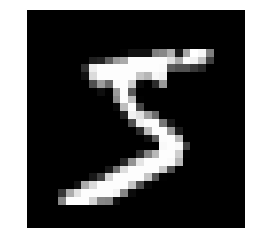

In [2]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the image
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Meta data of MNIST
print('\t\tMNSIT Dataset\t\t')
print('Training set size :\t',len(x_train))
print('Testing set size :\t',len(x_test))

# Display the an instance in our training set
print('\t\tImage Demo\t\t')
index = 0
_ = plt.imshow(x_train[index],cmap='gray')
_ = plt.axis('off')
print('Training image No.',index,'(label=',y_train[index],')')

# Pick a test image for demo
test_index = 0
test_image = x_test[test_index]
test_label = y_test[test_index]

# CNN Model
Convolution Nerual Network for MNIST digit classification.

In [3]:
# Using sequential model (strait forward pipeline with single input/output) from keras
model = keras.models.Sequential()

# Add convolution layers to our model
model.add(Conv2D(layer_1_filters,layer_1_kernel_size,input_shape=image_shape))
model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Conv2D(layer_2_filters,layer_2_kernel_size))
model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Flatten()) # reshape a n*n*depth image to a vector with dimension = n*n*depth
model.add(Dense(nn_size,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('\t\t\tOverview of Our CNN Model\t\t\t')
model.summary()

			Overview of Our CNN Model			
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 9)         45        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 9)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 9)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 9)         333       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 9)           0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 9)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 324)    

# Train model
We train our CNN model with the training data from MNIST for 2 epoch

In [4]:
# Reshape input (specified image depth for keras cnn)
x_train = x_train.reshape(-1,28,28,1)
# one-hot encoding label for as the target of model
y_train = keras.utils.to_categorical(y_train, 10)

_ = model.fit(x = x_train, y = y_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 17s 289us/step - loss: 0.3112 - acc: 0.9062
Epoch 2/2
60000/60000 [==============================] - 17s 292us/step - loss: 0.1117 - acc: 0.9652


# Test model
Verfy the performance of our CNN model with the testing data from MNIST.

In [5]:
x_test = x_test.reshape(-1,28,28,1)
y_test = keras.utils.to_categorical(y_test, 10)
loss,acc = model.evaluate(x_test,y_test)
print('Testing loss =',loss)
print('Testing accuracy =',acc)

pred_label = model.predict(x_test[test_index:test_index+1])[test_index]


10000/10000 [==============================] - 1s 140us/step
Testing loss = 0.0853926225269
Testing accuracy = 0.9731


Testing image No. 0 (label= 7 )
Our model's prediction:
	label = 0 prob. = 0.0000%
	label = 1 prob. = 0.0000%
	label = 2 prob. = 0.0002%
	label = 3 prob. = 0.0000%
	label = 4 prob. = 0.0000%
	label = 5 prob. = 0.0000%
	label = 6 prob. = 0.0000%
	label = 7 prob. = 0.9998%
	label = 8 prob. = 0.0000%
	label = 9 prob. = 0.0000%


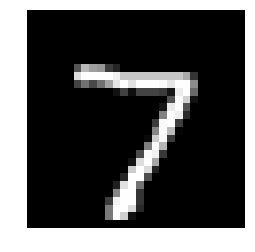

In [6]:
print('Testing image No.',test_index,'(label=',test_label,')')
_ = plt.imshow(test_image,cmap='gray')
_ = plt.axis('off')
print('Our model\'s prediction:')
for i in range(10):
    print('\tlabel =',i,'prob. = {:.4f}%'.format(pred_label[i]))
